In [1]:
from __future__ import print_function
import mdtraj as md
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import pandas as pd
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
#XRD Ensemble
#28 4NPQ
#18 4HFI
%matplotlib inline

In [2]:
"""

system no.
0. 5NJY_pH70
1. 5NJY_F238L_pH70
2. 5NJY_I233T_pH70
3. 5NJY_F238LI233T_pH70
4. 5NJY_pH46
5. 5NJY_F238L_pH46
6. 5NJY_I233T_pH46
7. 5NJY_F238LI233T_pH46
8. 4HFI_pH46
9. 4HFI_F238L_pH46
10. 4HFI_I233T_pH46
11. 4HFI_F238LI233T_pH46
12. 4NPQ_pH70
13. 4NPQ_F238L_pH70
14. 4NPQ_I233T_pH70
15. 4NPQ_F238LI233T_pH70

"""

'\n\nsystem no.\n0. 5NJY_pH70\n1. 5NJY_F238L_pH70\n2. 5NJY_I233T_pH70\n3. 5NJY_F238LI233T_pH70\n4. 5NJY_pH46\n5. 5NJY_F238L_pH46\n6. 5NJY_I233T_pH46\n7. 5NJY_F238LI233T_pH46\n8. 4HFI_pH46\n9. 4HFI_F238L_pH46\n10. 4HFI_I233T_pH46\n11. 4HFI_F238LI233T_pH46\n12. 4NPQ_pH70\n13. 4NPQ_F238L_pH70\n14. 4NPQ_I233T_pH70\n15. 4NPQ_F238LI233T_pH70\n\n'

In [3]:
traj_notes = ['5NJY_pH70_md1','5NJY_pH70_md2','5NJY_pH70_md3','5NJY_F238L_pH70_md1',
                 '5NJY_F238L_pH70_md2','5NJY_F238L_pH70_md3','5NJY_I233T_pH70_md1',
                  '5NJY_I233T_pH70_md2','5NJY_I233T_pH70_md3','5NJY_F238LI233T_pH70_md1',
                  '5NJY_F238LI233T_pH70_md2','5NJY_F238LI233T_pH70_md3','5NJY_pH46_md1','5NJY_pH46_md2','5NJY_pH46_md3','5NJY_F238L_pH46_md1',
                 '5NJY_F238L_pH46_md2','5NJY_F238L_pH46_md3','5NJY_I233T_pH46_md1',
                  '5NJY_I233T_pH46_md2','5NJY_I233T_pH46_md3','5NJY_F238LI233T_pH46_md1',
                  '5NJY_F238LI233T_pH46_md2','5NJY_F238LI233T_pH46_md3','4HFI_pH46_md1','4HFI_pH46_md2','4HFI_pH46_md3','4HFI_F238L_pH46_md1',
                 '4HFI_F238L_pH46_md2','4HFI_F238L_pH46_md3','4HFI_I233T_pH46_md1',
                  '4HFI_I233T_pH46_md2','4HFI_I233T_pH46_md3','4HFI_F238LI233T_pH46_md1',
                  '4HFI_F238LI233T_pH46_md2','4HFI_F238LI233T_pH46_md3','4NPQ_pH70_md5','4NPQ_pH70_md6','4NPQ_pH70_md7','4NPQ_F238L_pH70_md3',
                 '4NPQ_F238L_pH70_md4','4NPQ_F238L_pH70_md5','4NPQ_I233T_pH70_md3',
                  '4NPQ_I233T_pH70_md4','4NPQ_I233T_pH70_md5','4NPQ_F238LI233T_pH70_md3',
                  '4NPQ_F238LI233T_pH70_md4','4NPQ_F238LI233T_pH70_md5','4HFI_pH70_md1','4NPQ_F238LI233T_pH46_md1',
               '4NPQ_F238L_pH46_md1','4NPQ_F238L_pH46_md2','4NPQ_pH46_md1','4NPQ_I233T_pH46_md1','4NPQ_I233T_pH46_md2','4NPQ_I233T_pH46_md3']

In [45]:
md_data = pd.read_csv("glic_gating_new.csv")

In [5]:
md_5NJY_pH70 = md_data[(md_data.system == 0) | (md_data.system == 1) | (md_data.system == 2) | (md_data.system == 3)]
md_5NJY_pH46 = md_data[(md_data.system == 4) | (md_data.system == 5) | (md_data.system == 6) | (md_data.system == 7)]
md_4HFI_pH46 = md_data[(md_data.system == 8) | (md_data.system == 9) | (md_data.system == 10) | (md_data.system == 11)]
md_4NPQ_pH70 = md_data[(md_data.system == 12) | (md_data.system == 13) | (md_data.system == 14) | (md_data.system == 15)]

In [6]:
md_WT = md_data[~md_data.MD_name.str.contains('F238L') & ~md_data.MD_name.str.contains('I233T')]
md_F238L = md_data[md_data.MD_name.str.contains('F238L') & ~md_data.MD_name.str.contains('F238LI233T')]
md_I233T = md_data[md_data.MD_name.str.contains('I233T') & ~md_data.MD_name.str.contains('F238LI233T')]
md_F238LI233T = md_data[md_data.MD_name.str.contains('F238LI233T')]

In [7]:
md_traj10to50 = md_data[(md_data.traj_time >= 10) & (md_data.traj_time <= 50)]

In [46]:
md_data.columns

Index(['Unnamed: 0', 'MD_name', 'pH', 'replicate', 'traj_time', 'system',
       'rmsd', 'wholepca_pc1', 'wholepca_pc2', 'ecd_pc1', 'tmd_pc1',
       'domain twist', 'ecd_pc2', 'tmd_pc2', 'pore_profile_222',
       'pore_profile_226', 'pore_profile_230', 'pore_profile_233',
       'pore_profile_237', 'pore_profile_240', 'helix tilt angle',
       'helix twist angle', 'hydration_data', 'beta_expansion', 'M2_radius',
       'ECD_radius'],
      dtype='object')

In [47]:
dataset = md_data[['system','rmsd', 'wholepca_pc1', 'wholepca_pc2', 'ecd_pc1', 'tmd_pc1',
       'domain twist', 'ecd_pc2', 'tmd_pc2', 'pore_profile_222',
       'pore_profile_226', 'pore_profile_230', 'pore_profile_233',
       'pore_profile_237', 'pore_profile_240', 'helix tilt angle',
       'helix twist angle', 'hydration_data', 'beta_expansion', 'M2_radius',
       'ECD_radius']]

In [48]:
test_X = dataset[['rmsd', 'wholepca_pc1', 'wholepca_pc2', 'ecd_pc1', 'tmd_pc1',
       'domain twist', 'ecd_pc2', 'tmd_pc2', 'pore_profile_222',
       'pore_profile_226', 'pore_profile_230', 'pore_profile_233',
       'pore_profile_237', 'pore_profile_240', 'helix tilt angle',
       'helix twist angle', 'hydration_data', 'beta_expansion', 'M2_radius',
       'ECD_radius']]

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(test_X)
test_x_scaled = scaler.transform(test_X)

In [55]:
trainset = dataset[((dataset['system'] == 8) |(dataset['system'] == 9)|(dataset['system'] == 10)|(dataset['system'] == 12)|(dataset['system'] == 13)|(dataset['system'] == 14)) & (md_data['traj_time'] >= 30)]
trainset_2 = dataset[((dataset['system'] == 10) |(dataset['system'] == 12)) & (md_data['traj_time'] >= 30)]
trainset_3 = dataset[((dataset['system'] == 8) |(dataset['system'] == 9)|(dataset['system'] == 10)|(dataset['system'] == 11)|(dataset['system'] == 12)) & (md_data['traj_time'] >= 30)]
trainset_4 = dataset[((dataset['system'] == 12)|(dataset['system'] == 14)) & (md_data['traj_time'] >= 30)]


In [14]:
trainset = trainset.reset_index()
trainset = trainset.drop(['index'],axis=1)
trainset = trainset.replace({'system': {8: 1}})
trainset = trainset.replace({'system': {9: 1}})
trainset = trainset.replace({'system': {10: 1}})
#trainset = trainset.replace({'system': {11: 1}})
trainset = trainset.replace({'system': {12: 0}})
trainset = trainset.replace({'system': {13: 0.1}})
trainset = trainset.replace({'system': {14: 0.4}})
#trainset = trainset.replace({'system': {15: 0.2}})
Y = trainset.as_matrix()[:,0]
X = scaler.transform(trainset.as_matrix()[:,1:])


In [79]:
trainset_2 = trainset_2.reset_index()
trainset_2 = trainset_2.drop(['index'],axis=1)
trainset_2 = trainset_2.replace({'system': {8: 1}})
trainset_2 = trainset_2.replace({'system': {12: 0}})
Y = trainset_2.as_matrix()[:,0]
X = scaler.transform(trainset_2.as_matrix()[:,1:])


In [16]:
trainset_3 = trainset_3.reset_index()
trainset_3 = trainset_3.drop(['index'],axis=1)
trainset_3 = trainset_3.replace({'system': {8: 1}})
trainset_3 = trainset_3.replace({'system': {9: 1}})
trainset_3 = trainset_3.replace({'system': {10: 1}})
trainset_3 = trainset_3.replace({'system': {11: 1}})
trainset_3 = trainset_3.replace({'system': {12: 0}})
Y = trainset_3.as_matrix()[:,0]
X = scaler.transform(trainset_3.as_matrix()[:,1:])


In [56]:
trainset_4 = trainset_4.reset_index()
trainset_4 = trainset_4.drop(['index'],axis=1)
trainset_4 = trainset_4.replace({'system': {12: 0}})
trainset_4 = trainset_4.replace({'system': {14: 1}})
Y = trainset_4.as_matrix()[:,0]
X = scaler.transform(trainset_4.as_matrix()[:,1:])

In [80]:
from sklearn.svm import SVC
import os

clf = SVC(kernel="linear")

In [81]:
clf.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [82]:
clf.coef_

array([[ 0.04484479, -0.05288751, -0.06453368, -0.02334077, -0.10686149,
        -0.0221009 , -0.0092001 ,  0.05328678, -0.01972484, -0.04187041,
        -0.00384961,  0.04559463,  0.07146561,  0.09291597, -0.08959295,
         0.09577836,  0.05655769, -0.06598606,  0.10445412,  0.00469635]])

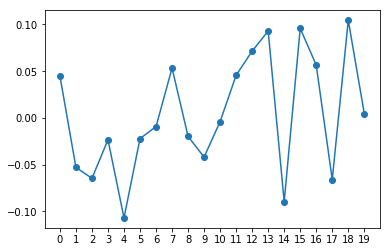

In [83]:
ax = plt.subplot()
plt.plot(clf.coef_.T,marker='o')
ax.set_xticks(np.arange(0,20))
plt.show()

In [85]:
b=clf.decision_function(test_x_scaled)/np.linalg.norm(clf.coef_)
#np.std(b[309:])

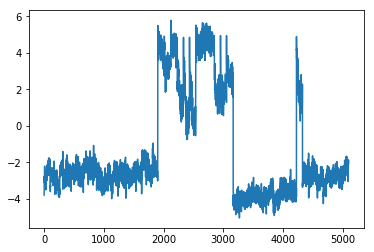

In [86]:
plt.plot(b)

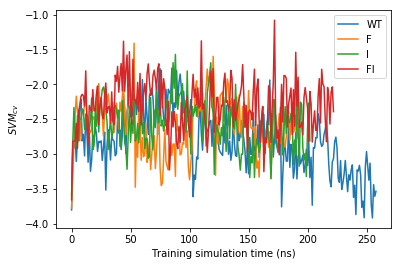

In [87]:
plt.plot(b[:test_X.index[dataset['system'] == 1][0]],label='WT')
plt.plot(b[test_X.index[dataset['system'] == 1][0]:test_X.index[dataset['system'] == 2][0]],label='F')
plt.plot(b[test_X.index[dataset['system'] == 2][0]:test_X.index[dataset['system'] == 3][0]],label='I')
plt.plot(b[test_X.index[dataset['system'] == 3][0]:test_X.index[dataset['system'] == 4][0]],label='FI')
plt.legend()
plt.xlabel("Training simulation time (ns)")
plt.ylabel(r'$SVM_{cv}$')

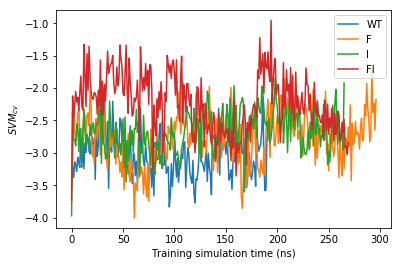

In [88]:
plt.plot(b[test_X.index[dataset['system'] == 4][0]:test_X.index[dataset['system'] == 5][0]],label='WT')
plt.plot(b[test_X.index[dataset['system'] == 5][0]:test_X.index[dataset['system'] == 6][0]],label='F')
plt.plot(b[test_X.index[dataset['system'] == 6][0]:test_X.index[dataset['system'] == 7][0]],label='I')
plt.plot(b[test_X.index[dataset['system'] == 7][0]:test_X.index[dataset['system'] == 8][0]],label='FI')
plt.legend()
plt.xlabel("Training simulation time (ns)")
plt.ylabel(r'$SVM_{cv}$')

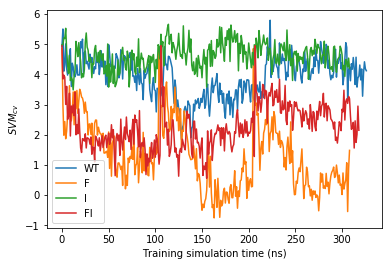

In [89]:
plt.plot(b[test_X.index[dataset['system'] == 8][0]:test_X.index[dataset['system'] == 9][0]],label='WT')
plt.plot(b[test_X.index[dataset['system'] == 9][0]:test_X.index[dataset['system'] == 10][0]],label='F')
plt.plot(b[test_X.index[dataset['system'] == 10][0]:test_X.index[dataset['system'] == 11][0]],label='I')
plt.plot(b[test_X.index[dataset['system'] == 11][0]:test_X.index[dataset['system'] == 12][0]],label='FI')
plt.legend()
plt.xlabel("Training simulation time (ns)")
plt.ylabel(r'$SVM_{cv}$')

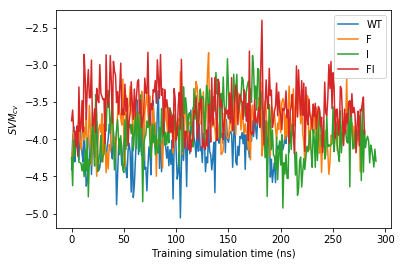

In [90]:
plt.plot(b[test_X.index[dataset['system'] == 12][0]:test_X.index[dataset['system'] == 13][0]],label='WT')
plt.plot(b[test_X.index[dataset['system'] == 13][0]:test_X.index[dataset['system'] == 14][0]],label='F')
plt.plot(b[test_X.index[dataset['system'] == 14][0]:test_X.index[dataset['system'] == 15][0]],label='I')
plt.plot(b[test_X.index[dataset['system'] == 15][0]:test_X.index[dataset['system'] == 16][0]],label='FI')
plt.legend()
plt.xlabel("Training simulation time (ns)")
plt.ylabel(r'$SVM_{cv}$')